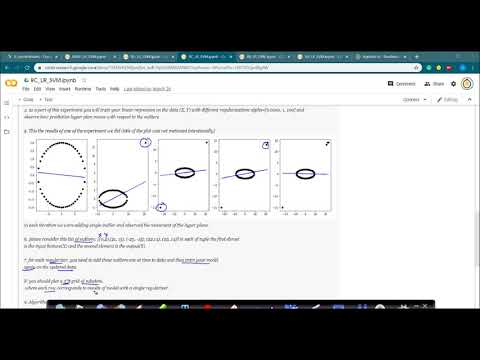

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('O5JdwJH9eg8', width = 700, height = 400)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points = np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

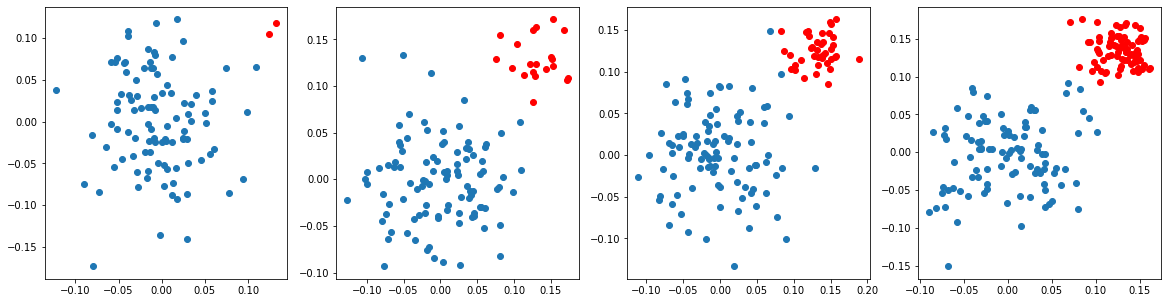

In [4]:
# here we are creating 2d imbalanced data points 

np.random.seed(15)

ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))

for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p = np.random.normal(0,0.05,size=(i[0],2), )
    X_n = np.random.normal(0.13,0.02,size=(i[1],2))
    y_p = np.array([1]*i[0]).reshape(-1,1)
    y_n = np.array([0]*i[1]).reshape(-1,1)
    X = np.vstack((X_p,X_n))
    y = np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
    
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

In [5]:
def plot_scatter(strength, row, column):
    
        X_p = np.random.normal(0,0.05,size=(column[0],2))
        X_n = np.random.normal(0.13,0.02,size=(i[1],2))
        y_p = np.array([1]*column[0]).reshape(-1,1)
        y_n = np.array([0]*column[1]).reshape(-1,1)
        x = np.vstack((X_p,X_n))
        y = np.vstack((y_p,y_n))
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.title(f'Regularization : {strength[row]} :: Data : {column}')
        
        return x, y 

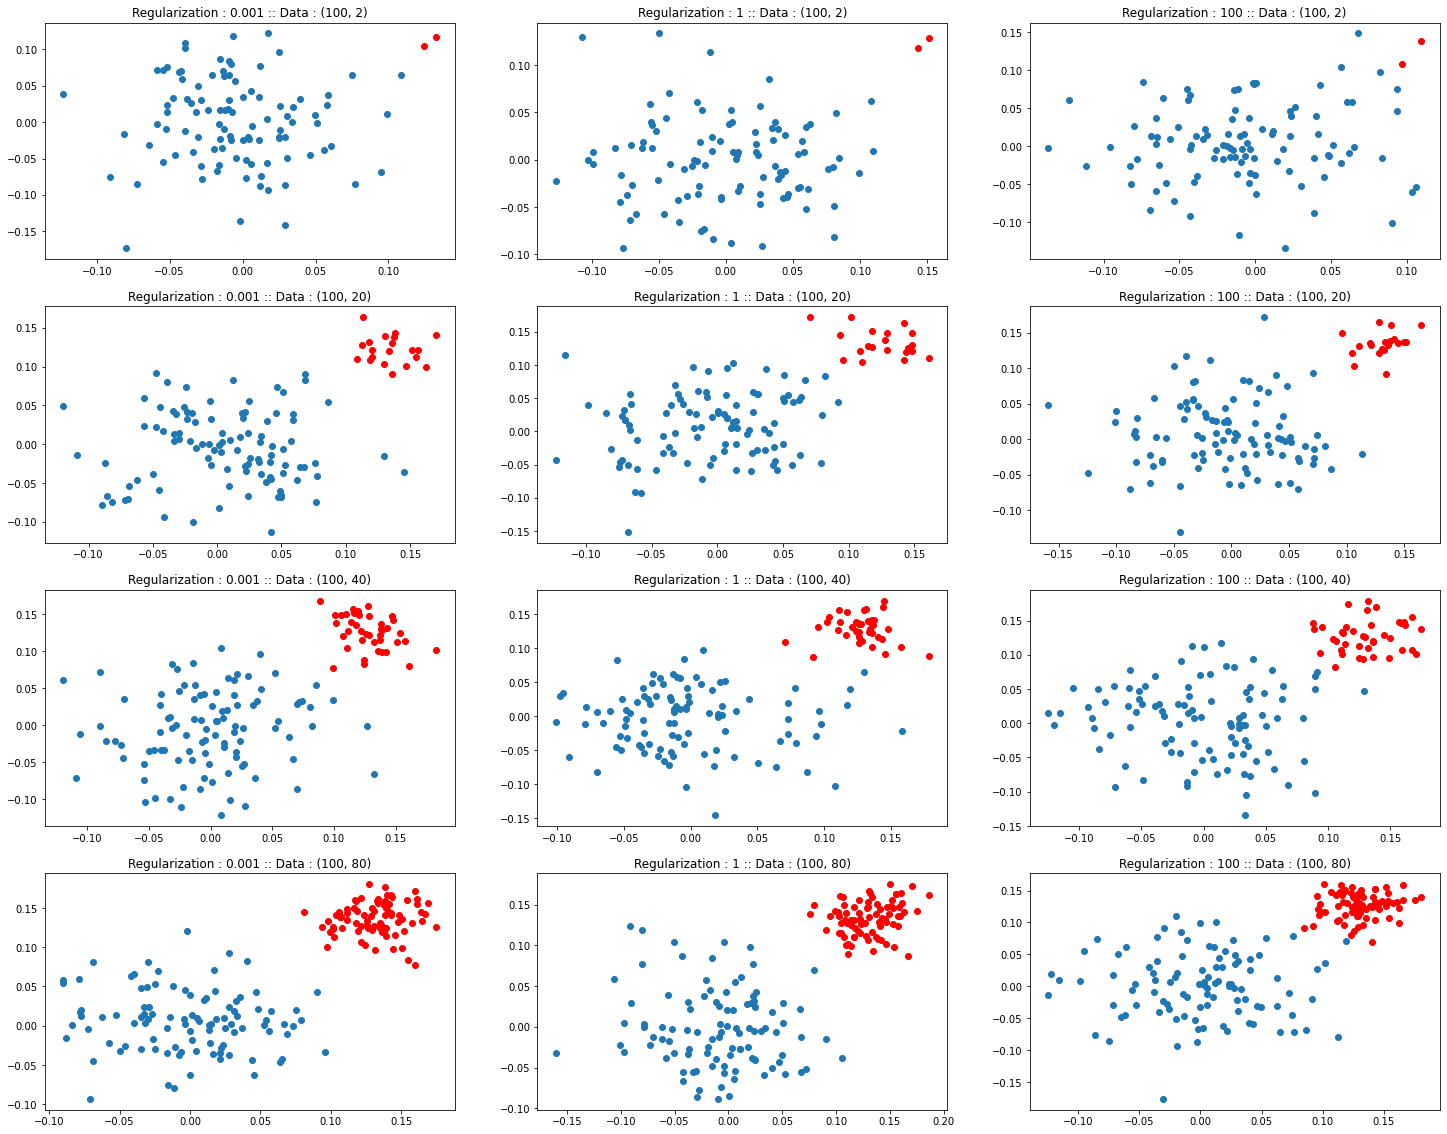

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

np.random.seed(15)

reg_strength =[0.001, 1, 100]
plt.figure(figsize = (25,20))
img_index = 1
for index,i in enumerate(ratios):
    for j in range(0, 3):
        plt.subplot(4, 3, img_index)
        img_index +=1
        x, y = plot_scatter(reg_strength, j, i)

plt.show()

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

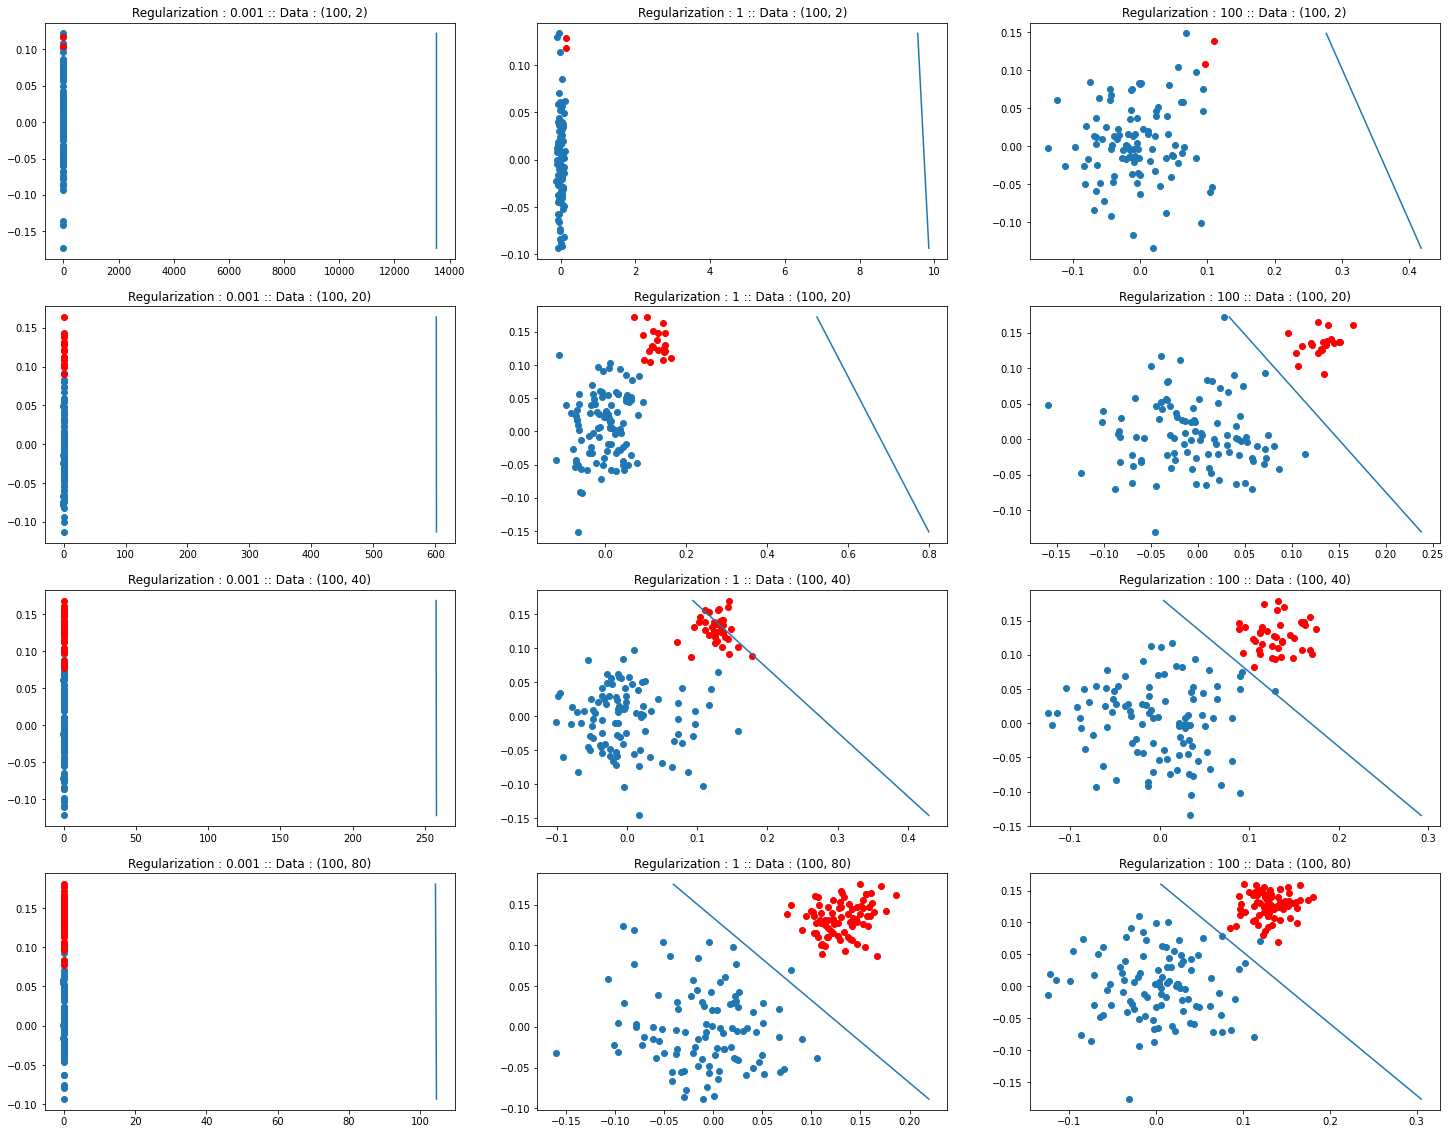

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

np.random.seed(15)

plt.figure(figsize = (25,20))
img_index = 1

for index,i in enumerate(ratios):
    for j in range(0, 3):
        svc_model = SVC(C=reg_strength[j], kernel="linear", random_state = 20)
        plt.subplot(4, 3, img_index)
        img_index +=1
        x, y = plot_scatter(reg_strength, j, i)
        
# https://stackoverflow.com/a/65815689   
        svc_model.fit(x,y)
        co_eff = svc_model.coef_[0]
        intercept = svc_model.intercept_
        margin = 1 / (np.sqrt(np.sum(svc_model.coef_ ** 2)))
        draw_line(co_eff, intercept, min(x[:,1]), max(x[:,1]))

plt.show()

**<font color='red'>Observation</font>**

* With 100, 2 imbalance data,
    - For C = 0.001, hyperplane failed to separated data points due too small learning rate value.
    - For C = 1, the hyperplane moved a bit in the direction of plotted data points, but only by a minimal rate.
    - For c = 100, the high learning rate did a good job and almost segregated the -ve points and +ve points.
    - From the above observation higher learning rate helped in segregation, but too high learning rate may lead jumping of points in loss finction optimazation.<br><br>

* With 100, 20 imbalance data,
    - For C = 0.001, hyperplane failed to separated data points.
    - For C = 1, the hyperplane moved a bit in the direction of plotted data points by a good margin and the +ve and -ve points were clearly clustered.
    - For C = 100, the high learning rate done a better job and have segregated the both points better then the (100, 2) data points.
    
- With 100, 40 imbalance data,

    - For C = 0.001, hyperplane failed to separated data points.
    - For C = 1, the hyperplane tilted in the direction of data points and segregated few -ve data points.
    - For C = 100, the high learning rate did a nice job and have segregated the -ve points perfectly.

* With 100, 80 imbalance data,

    - For C = 0.001, hyperplane failed to separated data points.
    - For C = 1, the hyperplane moved in the direction of data and separated the both the data points well neatly.
    - For C = 100, the high learning rate also did a reat job in segregating the -ve and +ve points accuratly.

- When the regularization value is small SVM keeps to fails classify the data points in this imbalance dataset.

- With increasing learning rate, we gets a better result in the given dataset.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

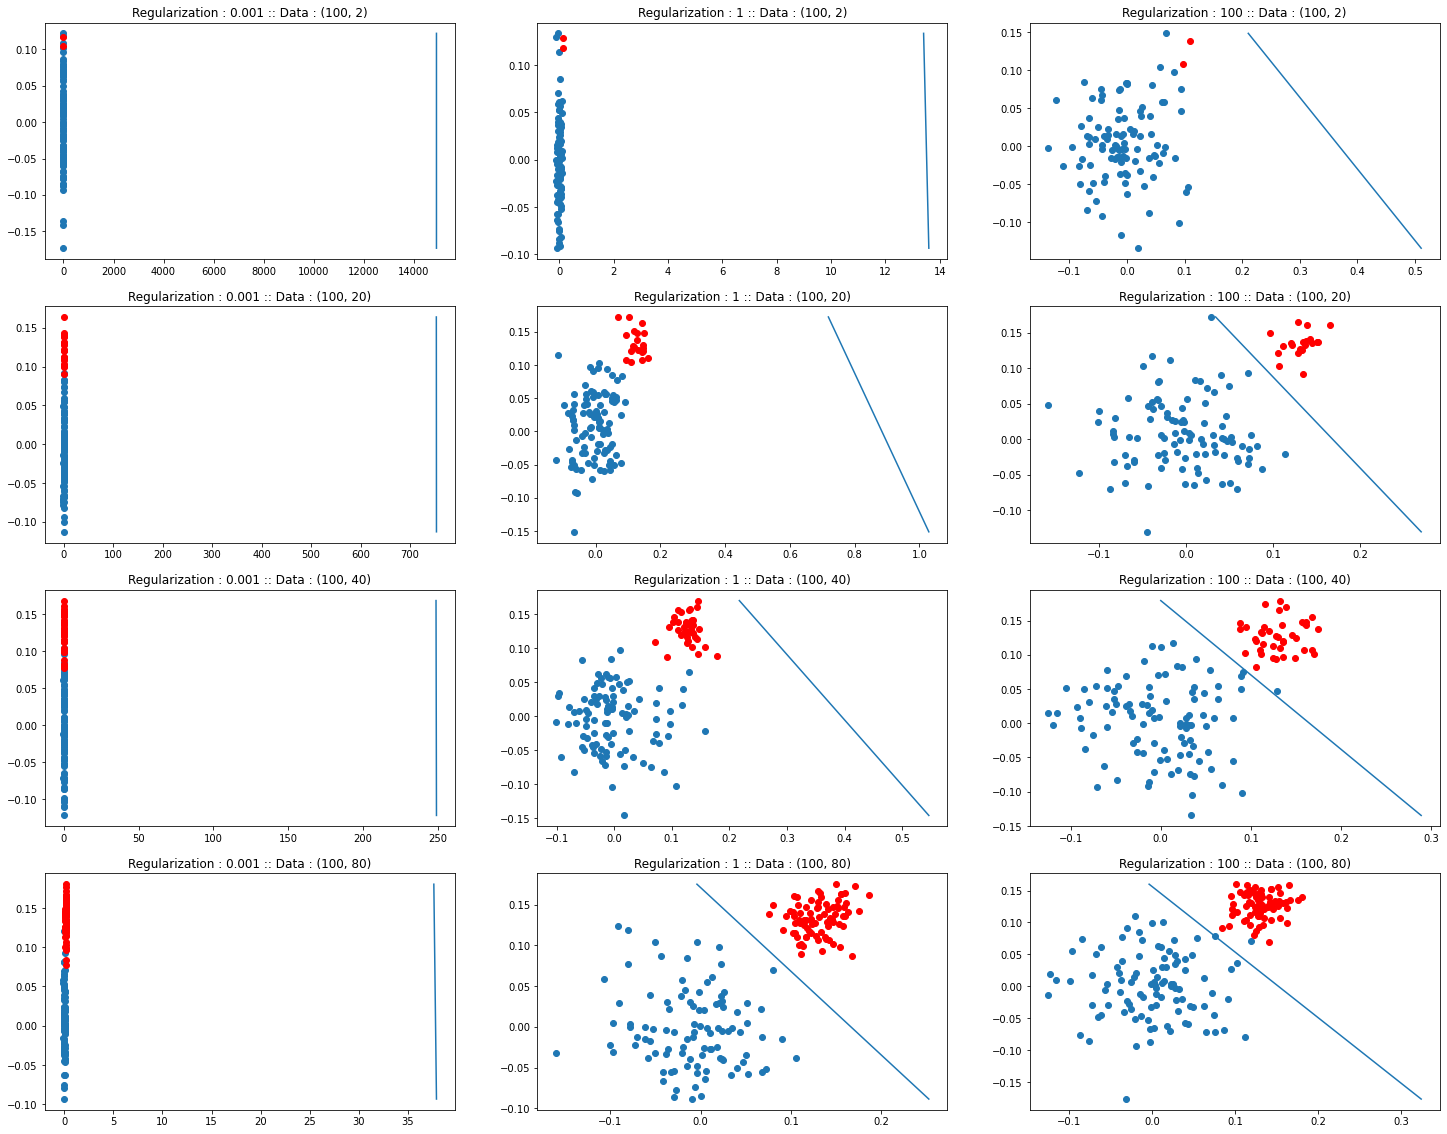

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

np.random.seed(15)

# reg_strength =[0.001, 1, 100]
plt.figure(figsize = (25,20))
img_index = 1

for index,i in enumerate(ratios):
    for j in range(0, 3):
        lr_model = LogisticRegression(C=reg_strength[j], random_state = 20)
        plt.subplot(4, 3, img_index)
        img_index +=1
        x, y = plot_scatter(reg_strength, j, i)
        
# https://stackoverflow.com/a/65815689      
        lr_model.fit(x,y)
        co_eff = lr_model.coef_[0]
        intercept = lr_model.intercept_        
        margin = 1 / (np.sqrt(np.sum(lr_model.coef_ ** 2)))
        draw_line(co_eff, intercept, min(x[:,1]), max(x[:,1]))

plt.show()

**<font color='red'>Observation</font>**

- While the regularization value is small the keeps fails to classify the data points despite of the dataset imbalance.
- In SVM when the learning rate is 0.001 the hyperplane moved only a bit, however in the case of LR even with same learning rate 0.001 the hyperplane moved more towards the data points.
- While comparing this overall with SVM, the LR have worked better in classifying the data points.